<a href="https://colab.research.google.com/github/ravishnirala/DeepLearning/blob/main/Deeplearning_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Importing some important library for face recognization by using CNN
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [61]:
# Set the path to the directory containing the face images
face_dir='/content/drive/MyDrive/archive (3)/images'

In [62]:
# Load the images and labels
x_data=[]
y_data=[]


In [63]:
#Iterate over the face image directory and load the images
for filename in os.listdir(face_dir):
   if filename.endswith(".jpg") or filename.endswith(".png"):
       img_path=os.path.join(face_dir,filename)
       img=load_img(img_path,target_size=(64,64))
       img_array=img_to_array(img)
       x_data.append(img_array)
       label=filename.split(".")[0]
       y_data.append(label)



In [64]:
# Convert the data to numpy arrays
x_data = np.array(x_data)
y_data= np.array(y_data)

In [65]:
print(x_data)
print(y_data)

[[[[226. 208. 162.]
   [232. 210. 171.]
   [229. 210. 167.]
   ...
   [182. 162. 127.]
   [179. 160. 128.]
   [171. 155. 122.]]

  [[229. 208. 163.]
   [230. 208. 167.]
   [230. 212. 172.]
   ...
   [171. 155. 121.]
   [181. 162. 130.]
   [170. 155. 122.]]

  [[236. 215. 170.]
   [241. 222. 180.]
   [235. 213. 172.]
   ...
   [170. 155. 122.]
   [176. 155. 124.]
   [177. 161. 128.]]

  ...

  [[177. 161. 135.]
   [165. 145. 118.]
   [183. 167. 144.]
   ...
   [129. 113. 100.]
   [117. 105.  89.]
   [145. 128. 120.]]

  [[191. 168. 150.]
   [171. 155. 129.]
   [188. 171. 153.]
   ...
   [148. 136. 120.]
   [136. 118. 106.]
   [128. 112.  97.]]

  [[190. 171. 154.]
   [185. 166. 149.]
   [173. 156. 136.]
   ...
   [142. 131. 113.]
   [150. 138. 122.]
   [127. 113. 100.]]]


 [[[141. 103.  82.]
   [143. 105.  82.]
   [147. 109.  90.]
   ...
   [127. 108. 101.]
   [122. 105.  97.]
   [129. 109. 100.]]

  [[151. 115.  93.]
   [147. 111.  89.]
   [149. 111.  90.]
   ...
   [130. 113. 105.]
 

In [66]:
#Extract numeric part from filesnames
y_data_numeric = np.array([int(label) for label in y_data if label.isdigit()])


In [67]:
print(y_data_numeric)
# sorted list of y_data_numeric
print(np.unique(y_data_numeric))

[26 25 24  3 29 28 23 27 30 35 32 42 38 40 33 39  4 34 36 43 41 37 31 47
 46 52 48 53 55 54 49 50 51 44 45  5 62 57 61 59  6 68 66 56 69 67 63 64
 65 60 58  7 70 72 76 74 73 77 78 71 75 81 84 88 86 80 87 83 91 79 85  9
 89 90  8 82 95 92 93 94 97 96 98 99]
[ 3  4  5  6  7  8  9 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95 96 97 98 99]


In [68]:

# Ensure data shapes match
if x_data.shape[0] != y_data_numeric.shape[0]:
    min_length = min(x_data.shape[0], y_data_numeric.shape[0])
    x_data = x_data[:min_length]
    y_data_numeric = y_data_numeric[:min_length]

# Calculate num_classes based on unique values in y_data_numeric
if len(y_data_numeric) == 0:
    num_classes = 1  # Set a default value for num_classes
else:
    num_classes = np.max(y_data_numeric) + 1  # Calculate num_classes based on the maximum value in y_data_numeric

# Convert labels to one-hot encoded vectors
y_data_encoded = tf.keras.utils.to_categorical(y_data_numeric, num_classes)

# Ensure that x_data and y_data_encoded have the same number of samples
x_data = x_data[:len(y_data_encoded)]

print(y_data_encoded)
print(len(y_data_encoded))
print(len(x_data))
print(y_data_encoded.shape)
print(x_data.shape)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
84
84
(84, 100)
(84, 64, 64, 3)


In [69]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data_encoded, test_size=0.2, random_state=42)

print(f'x_train shape: {x_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

x_train shape: (67, 64, 64, 3)
x_val shape: (17, 64, 64, 3)
y_train shape: (67, 100)
y_val shape: (17, 100)


In [70]:
# Define the CNN architecture for face recognition
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [71]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
#Train the CNN model
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.0000e+00 - loss: 457.9560 - val_accuracy: 0.0588 - val_loss: 1597.3275
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.0114 - loss: 1392.3418 - val_accuracy: 0.0000e+00 - val_loss: 1116.6730
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.0419 - loss: 808.4313 - val_accuracy: 0.0000e+00 - val_loss: 834.3301
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.0306 - loss: 555.0646 - val_accuracy: 0.0588 - val_loss: 470.1329
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.0419 - loss: 275.8728 - val_accuracy: 0.0000e+00 - val_loss: 275.3806
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.1297 - loss: 125.5829 - val_accuracy: 0.0000e+00 - val_loss: 171.1439
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2213 - loss: 61.2449 - val_accuracy: 0.0588 - val_loss: 121.7100
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.3396

In [73]:
!pip install opencv-python
!pip install mtcnn
import cv2
from google.colab.patches import cv2_imshow
from mtcnn.mtcnn import MTCNN
detector=MTCNN()


Enter an index between 0 and 83: 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


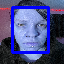

In [76]:
# Function to detect and display face in the image at the given index
def detect_and_display_face(index):
    if index < 0 or index >= len(x_data):
        print(f"Index out of range. Please enter a number between 0 and {len(x_data) - 1}.")
        return

    # Detect faces in the specified image
    detect = detector.detect_faces(x_data[index])
    if not detect:
        print("No face detected in the specified image.")
        return

    # Get the bounding box of the first detected face
    x, y, w, h = detect[0]['box']

    # Draw a rectangle around the detected face
    img_with_box = x_data[index].copy()
    cv2.rectangle(img_with_box, pt1=(x, y), pt2=(x + w, y + h), color=(255, 0, 0), thickness=2)

    # Display the image with the detected face
    cv2_imshow(img_with_box)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Get user input for the index
try:
    index = int(input(f"Enter an index between 0 and {len(x_data) - 1}: "))
    detect_and_display_face(index)
except ValueError:
    print("Invalid input. Please enter an integer.")
